<a href="https://colab.research.google.com/github/Sarvagyam/CreditCardAnalysis/blob/main/AssignmentBA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import time
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [47]:
df = pd.read_excel('/content/Assignment - 1.xlsx',sheet_name = 'Ecomm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [48]:
df.shape

(5630, 20)

In [49]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

#1. Data Cleaning

In [50]:
#making changes in dataset to reduce redundancy of values
df['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'},inplace=True)
df['PreferredPaymentMode'].replace({'Cash on Delivery':'COD', 'CC':'Credit Card'},inplace=True)
df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'},inplace=True)
for column in df:
  print(f'{column} : {df[column].unique()}')

CustomerID : [50001 50002 50003 ... 55628 55629 55630]
Churn : [1 0]
Tenure : [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
PreferredLoginDevice : ['Mobile Phone' 'Computer']
CityTier : [3 1 2]
WarehouseToHome : [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
PreferredPaymentMode : ['Debit Card' 'UPI' 'Credit Card' 'COD' 'E wallet']
Gender : ['Female' 'Male']
HourSpendOnApp : [ 3.  2. nan  1.  0.  4.  5.]
NumberOfDeviceRegistered : [3 4 5 2 1 6]
PreferedOrderCat : ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
SatisfactionScore : [2 3 5 4 1]
MaritalStatus : ['Single' 'Divorced' 'Married']
NumberOfAddress : [ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]
Complain : [1 0]
OrderAmountHikeFromlastYear : [11. 15. 14. 23. 22. 16. 12. nan 13

In [51]:
#dropping the null values from the dataset
df.dropna(how = 'any',axis=0,inplace=True)

In [52]:
df.Churn.value_counts()

0    3143
1     631
Name: Churn, dtype: int64

In [53]:
#correcting the datatype of the columns
column_to_int = ['CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'OrderAmountHikeFromlastYear', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp']
for col in column_to_int:
  df[col] = df[col].astype(int)

In [54]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                           int64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                  int64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                   int64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear      int64
CouponUsed                       int64
OrderCount                       int64
DaySinceLastOrder                int64
CashbackAmount                 float64
dtype: object

In [55]:
#converting the data values to numerical values for better computation for the algorithm
df['Gender'].replace({'Female':1, 'Male': 0},inplace = True)
df.Gender.unique()

array([1, 0])

In [56]:
#applying one hot encoding to categorized data
df_clean =pd.get_dummies(data = df, columns=['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat', 'MaritalStatus','CityTier'])
df_clean.columns

Index(['CustomerID', 'Churn', 'Tenure', 'WarehouseToHome', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Credit Card',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'CityTier_1', 'CityTier_2', 'CityTier_3'],
      dtype='object')

In [57]:
df_clean.shape

(3774, 33)

In [58]:
#making data scale to 0 to 1 for better and faster computation
col_to_scale = ['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_clean[col_to_scale] = scaler.fit_transform(df_clean[col_to_scale])

In [59]:
df_clean.drop('CustomerID',axis='columns',inplace=True)

In [60]:
for column in df_clean:
  print(f'{column} : {df_clean[column].unique()}')

# data has been scaled

Churn : [1 0]
Tenure : [0.07843137 0.         0.21568627 0.17647059 0.37254902 0.39215686
 0.2745098  0.15686275 0.09803922 0.03921569 0.58823529 0.25490196
 0.05882353 0.35294118 0.56862745 0.45098039 0.50980392 0.1372549
 0.19607843 0.29411765 0.43137255 0.01960784 0.52941176 0.49019608
 0.54901961 0.47058824 0.23529412 0.11764706 0.31372549 0.41176471
 0.33333333 0.98039216 0.60784314 1.        ]
WarehouseToHome : [0.00819672 0.08196721 0.13934426 0.04918033 0.06557377 0.12295082
 0.05737705 0.19672131 0.17213115 0.07377049 0.04098361 0.20491803
 0.02459016 0.10655738 0.1147541  0.18032787 0.24590164 0.1557377
 0.09016393 0.2295082  0.22131148 0.03278689 0.14754098 0.09836066
 0.23770492 0.21311475 0.18852459 0.16393443 0.13114754 0.
 0.99180328 0.01639344 0.25409836 1.        ]
Gender : [1 0]
HourSpendOnApp : [0.6 0.4 0.2 0.8 0.  1. ]
NumberOfDeviceRegistered : [0.4 0.6 0.8 0.2 0.  1. ]
SatisfactionScore : [0.25 1.   0.5  0.75 0.  ]
NumberOfAddress : [0.38095238 0.33333333 0.047619

In [82]:
#checking correlation between the columns
df_clean.corr()

,Churn,Tenure,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,CityTier_1,CityTier_2,CityTier_3
Churn,1.000000,-0.340013,0.087318,-0.033792,0.060845,0.149041,0.095759,0.076336,0.238137,0.017193,...,-0.017880,-0.184584,0.183750,0.010208,-0.013023,-0.159808,0.179481,-0.071851,0.001592,0.072950
Tenure,-0.340013,1.000000,-0.016353,0.052123,-0.029818,-0.058752,-0.009972,0.196547,-0.035228,0.012197,...,0.091251,0.104482,-0.219010,0.103702,0.015788,0.085990,-0.103150,0.052275,0.017008,-0.060373
WarehouseToHome,0.087318,-0.016353,1.000000,-0.035581,0.052731,0.024582,0.000434,0.003422,0.003829,0.031975,...,0.003512,0.043231,-0.033932,-0.035530,-0.013650,0.038336,-0.030496,0.005213,-0.048595,0.014183
Gender,-0.033792,0.052123,-0.035581,1.000000,0.009952,0.026706,0.032398,0.030980,0.039522,-0.010081,...,-0.005292,0.043367,-0.052031,0.006532,0.012541,-0.035047,0.027833,-0.009022,-0.043250,0.026616
HourSpendOnApp,0.060845,-0.029818,0.052731,0.009952,1.000000,0.293021,0.039879,0.124962,0.020413,0.096827,...,-0.017382,-0.130819,0.233904,0.023109,0.018024,0.022257,-0.037134,0.067968,-0.000672,-0.069343
NumberOfDeviceRegistered,0.149041,-0.058752,0.024582,0.026706,0.293021,1.000000,-0.017788,0.066684,0.018881,0.083342,...,0.022548,-0.080608,0.138667,0.035364,-0.001099,-0.064517,0.069345,0.003889,0.022722,-0.013112
SatisfactionScore,0.095759,-0.009972,0.000434,0.032398,0.039879,-0.017788,1.000000,0.054627,-0.044533,-0.008143,...,0.027097,-0.025448,0.008771,0.030401,0.051528,-0.012167,-0.025659,0.015915,0.015125,-0.022377
NumberOfAddress,0.076336,0.196547,0.003422,0.030980,0.124962,0.066684,0.054627,1.000000,-0.017363,0.010275,...,-0.005968,0.059515,-0.033983,-0.004349,-0.024802,-0.001463,0.020125,0.038587,0.032438,-0.052553
Complain,0.238137,-0.035228,0.003829,0.039522,0.020413,0.018881,-0.044533,-0.017363,1.000000,0.003260,...,0.004534,-0.018126,0.017412,0.007866,0.012777,-0.000364,-0.009180,0.011890,-0.030390,0.000031
OrderAmountHikeFromlastYear,0.017193,0.012197,0.031975,-0.010081,0.096827,0.083342,-0.008143,0.010275,0.003260,1.000000,...,0.041476,-0.024964,0.054050,0.021090,-0.014517,0.014894,-0.004949,0.032166,-0.027561,-0.021872


#2. Creating Models for Prediction

In [62]:
x = df_clean.drop('Churn',axis='columns')
y = df_clean['Churn']

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 5)

In [64]:
x_train.shape

(3019, 31)

In [65]:
x_test.shape

(755, 31)

##a. ANN Prediction

In [66]:
#checking the prediction with ANN
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(21,input_shape=(31,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')

])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
95/95 [==============================] - 1s 2ms/step - loss: 0.6173 - accuracy: 0.6602
Epoch 2/100
95/95 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.8344
Epoch 3/100
95/95 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8344
Epoch 4/100
95/95 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.8364
Epoch 5/100
95/95 [==============================] - 0s 2ms/step - loss: 0.3638 - accuracy: 0.8437
Epoch 6/100
95/95 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8523
Epoch 7/100
95/95 [==============================] - 0s 3ms/step - loss: 0.3380 - accuracy: 0.8625
Epoch 8/100
95/95 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8662
Epoch 9/100
95/95 [==============================] - 0s 3ms/step - loss: 0.3227 - accuracy: 0.8688
Epoch 10/100
95/95 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8718
Epoch 11/

In [85]:
import time

import numpy as np

start_time = time.time()
model.evaluate(x_test,y_test)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")



24/24 [==============================] - 0s 1ms/step - loss: 0.2394 - accuracy: 0.9073
Elapsed time to compute the importances: 0.126 seconds


In [70]:
yp = model.predict(x_test)
yp[:5]
y_pred = []
for ele in yp :
  if ele > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

24/24 [==============================] - 0s 1ms/step


In [73]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       624
           1       0.84      0.58      0.68       131

    accuracy                           0.91       755
   macro avg       0.88      0.78      0.82       755
weighted avg       0.90      0.91      0.90       755



Text(95.72222222222221, 0.5, 'Truth')

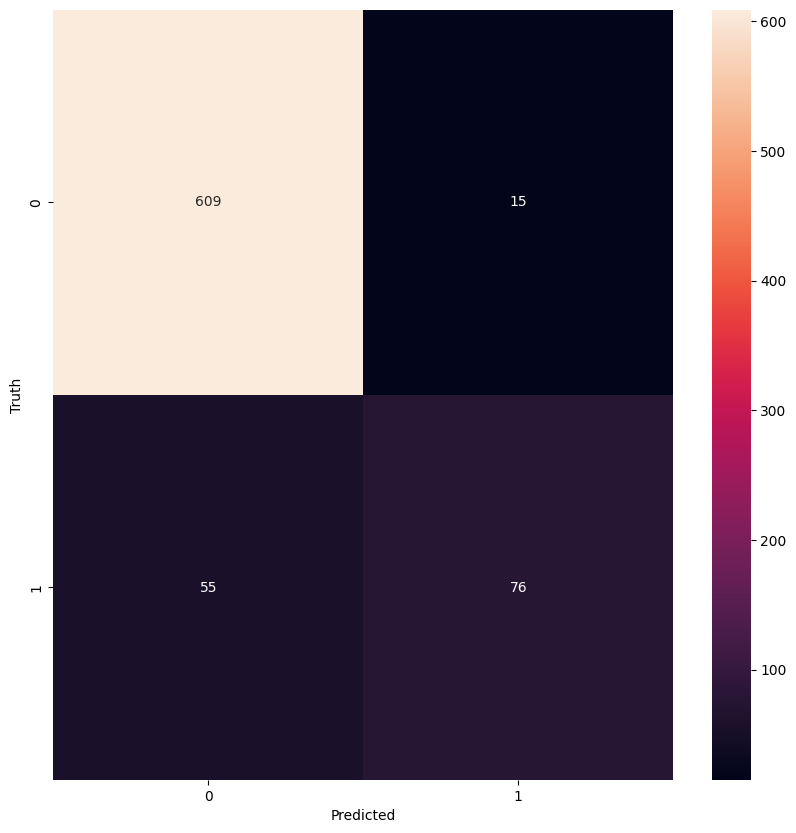

In [74]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,10))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [75]:
df_clean.columns

Index(['Churn', 'Tenure', 'WarehouseToHome', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'CityTier_1',
       'CityTier_2', 'CityTier_3'],
      dtype='object')

##b. Decision Tree Prediction

In [76]:
#checking the prediction with Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier

feature_names = [x.columns[i] for i in range(x.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(x_train, y_train)


RandomForestClassifier(random_state=0)

In [84]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
from sklearn import tree
start_time = time.time()
y_pred_clf = clf.predict(x_test)
elapsed_time_DTC = time.time() - start_time

print(f"Elapsed time to compute with Decision Tree: {elapsed_time_DTC:.3f} seconds")

Elapsed time to compute with Decision Tree: 0.003 seconds


Text(95.72222222222221, 0.5, 'Truth')

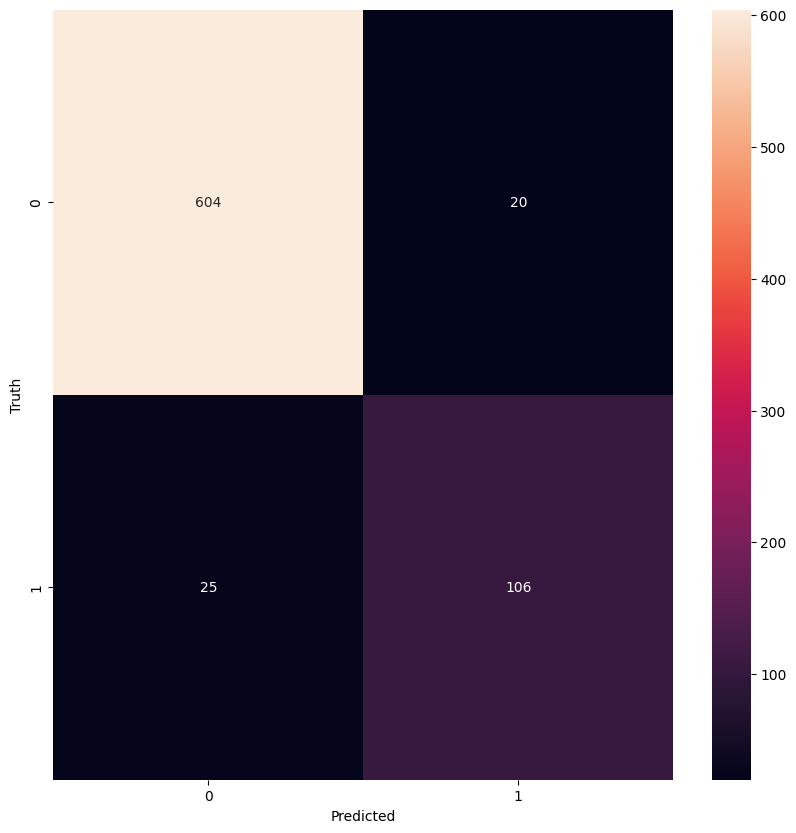

In [80]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_clf)

plt.figure(figsize = (10,10))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       624
           1       0.84      0.81      0.82       131

    accuracy                           0.94       755
   macro avg       0.90      0.89      0.89       755
weighted avg       0.94      0.94      0.94       755



#3. Summary

The Accuracy of the models that have been calculated for ANN(Neural Networks) and Decision Tree(Random Forest Classifier) are 0.91 and 0.94 respectively. The computation time for the respective algorithms are 0.12 secs and 0.03 secs. Hence we can conclude the Decision Tree works better and efficient with this dataset.

As per the analysis we can conclude that the Churn actually depends on some of the features more than others. The features Tenure,PreferredLoginDevice,PreferredPaymentMode,PreferedOrderCat, CashbackAmount are more responsible for  churn of the users.

###Tenure

People with lesser tenure are leaving the application soon but users with high tenure they are still with the application.

###PreferredLoginDevice

Users with Mobile Device Logins are more into churn as per the data.

###PreferredPaymentMode

Users with Debit/Credit card payments are churning.

###PreferredOrderCat

Users with Search for Phones or Mobile Phones churned more.

###CashbackAmount

Users who got churned had less Cashbacks than the ones not churned.



In [95]:
pp_df = df.filter(['Tenure','PreferredLoginDevice','PreferredPaymentMode','PreferredOrderCat','CashbackAmount','Churn'],axis = 1)
pp_df.head()

,Tenure,PreferredLoginDevice,PreferredPaymentMode,CashbackAmount,Churn
0,4,Mobile Phone,Debit Card,159.93,1
3,0,Mobile Phone,Debit Card,134.07,1
5,0,Computer,Debit Card,139.19,1
11,11,Mobile Phone,Debit Card,153.81,1
12,0,Mobile Phone,COD,134.41,1


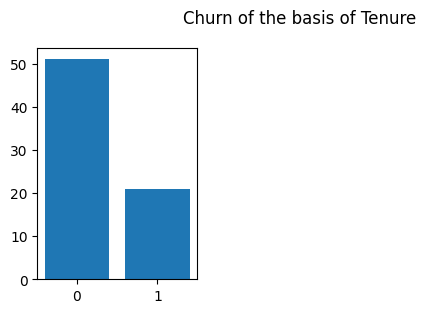

In [110]:
plt.figure(figsize=(7, 3))

plt.subplot(131)
plt.bar(pp_df['Churn'],pp_df['Tenure'])
plt.suptitle('Churn on the basis of Tenure')
plt.show()

In [113]:
pp_df.groupby(['Churn'])['PreferredLoginDevice'].value_counts()

Churn  PreferredLoginDevice
0      Mobile Phone            2244
       Computer                 899
1      Mobile Phone             419
       Computer                 212
Name: PreferredLoginDevice, dtype: int64

In [114]:
pp_df.groupby(['Churn'])['PreferredPaymentMode'].value_counts()

Churn  PreferredPaymentMode
0      Debit Card              1308
       Credit Card              980
       E wallet                 349
       COD                      269
       UPI                      237
1      Debit Card               230
       Credit Card              179
       E wallet                  94
       COD                       80
       UPI                       48
Name: PreferredPaymentMode, dtype: int64

In [136]:
churned = pp_df[pp_df['Churn'] == 1]
ch = churned['CashbackAmount'].sum()
print(f'Churned Cashback Amount : {ch}')

unchurned = pp_df[pp_df['Churn'] == 0]
un = unchurned['CashbackAmount'].sum()
print(f'Unchurned Cashback Amount : {un}')

Churned Cashback Amount : 101625.39
Unchurned Cashback Amount : 518116.7


In [150]:
pp_df.groupby(by = ['PreferredPaymentMode','Churn'])['CashbackAmount'].sum()

PreferredPaymentMode  Churn
COD                   0         44878.45
                      1         12372.30
Credit Card           0        158289.49
                      1         28582.75
Debit Card            0        216917.15
                      1         36633.70
E wallet              0         59599.99
                      1         16468.38
UPI                   0         38431.62
                      1          7568.26
Name: CashbackAmount, dtype: float64